In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# General overview

In [2]:
df = pd.read_excel('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data_cleaning_and_analysis.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   provider-name__lnk               157 non-null    object
 1   provider-details__specialty      157 non-null    object
 2   sr-only                          157 non-null    object
 3   star-rating__reviews             157 non-null    object
 4   sr-only 2                        124 non-null    object
 5   location-info__office-loc        157 non-null    object
 6   location-info__office-loc 2      157 non-null    object
 7   feats-of-strength__feat-title    120 non-null    object
 8   feats-of-strength__feat-title 2  106 non-null    object
 9   feats-of-strength__feat-title 3  104 non-null    object
 10  location-info__distance 2        157 non-null    object
 11  star-rating href                 33 non-null     object
dtypes: object(12)
memory usage: 14.9+ KB

In [4]:
df.head()

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance 2,star-rating href
0,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",51 ratings,with,10293 N Meridian St Ste 200,"Indianapolis, IN 46290",Offers Telehealth,Easy scheduling,Employs friendly staff,11.5 mi,NaN
1,"Dr. Janet Turkle, MD","Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",303 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN
2,"Dr. Emily Hrisomalos, MD","Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",69 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN
3,"Dr. Christopher Jones, MD","Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",39 ratings,with,320 N Meridian St,"Indianapolis, IN 46204",Easy scheduling,Employs friendly staff,Explains conditions well,0.2 mi,NaN
4,"Dr. Rachel Scott, MD","Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",25 ratings,with,100 Hospital Ln,"Danville, IN 46122",Offers Telehealth,Easy scheduling,Employs friendly staff,18.3 mi,NaN


In [5]:
file = pd.ExcelFile('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data_cleaning_and_analysis.xlsx')

In [6]:
names = file.sheet_names
names

['Indiana', 'Missouri', 'Iowa', 'Wisconsin', 'Nebraska', 'Kansas', 'Illinois']

In [7]:
sheet = {}
for i in range(len(names)):
    sheet[names[i]] = file.parse(i, header=None)

In [8]:
for i in range(len(sheet)):
    sheet[names[i]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       158 non-null    object
 1   1       158 non-null    object
 2   2       158 non-null    object
 3   3       158 non-null    object
 4   4       125 non-null    object
 5   5       158 non-null    object
 6   6       158 non-null    object
 7   7       121 non-null    object
 8   8       107 non-null    object
 9   9       105 non-null    object
 10  10      158 non-null    object
 11  11      34 non-null     object
dtypes: object(12)
memory usage: 15.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       35 non-null     object
 1   1       112 non-null    object
 2   2       112 non-null    object
 3   3       112 non-null    object
 4   4       112 non-null   

# Cleaning

In [9]:
# test case
sheet['Indiana'].iloc[1, :].isna().to_list()
len(sheet['Indiana'])

159

In [10]:
# when I do data exploration, I find there are two sheets inside Kansas data because of warning when I process sheet 6
# So I move back here to clean this sheet again
sheet6 = sheet['Kansas']
split = sheet6[sheet6[0] == '_2YrD_ src'].index[0]
split
# sheet6.columns

116

In [11]:
# keep Kansas sheet before row 111 and remove rows after 111 to sheet Kansas_2
sheet['Kansas_2'] = sheet['Kansas'].iloc[split:].copy()
sheet['Kansas'] = sheet['Kansas'].iloc[:split].copy()

In [12]:
sheet['Kansas'].tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
111,"Dr. Patricio Roman, MD",https://www.healthgrades.com/physician/dr-patr...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,2660 Sw 3rd St,"Topeka, KS 66606",57.5 mi,NaN,NaN,NaN,https://www.healthgrades.com/physician/dr-patr...,NaN,NaN,NaN
112,"Dr. Manny Moser, MD",https://www.healthgrades.com/physician/dr-mann...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,1001 SW GARFIELD AVE,"Topeka, KS 66604",57.6 mi,NaN,NaN,NaN,https://www.healthgrades.com/physician/dr-mann...,NaN,NaN,NaN
113,"Dr. Lee Daniel, MD",https://www.healthgrades.com/physician/dr-lee-...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,710 W 8th St,"Fort Scott, KS 66701",88.7 mi,NaN,NaN,NaN,https://www.healthgrades.com/physician/dr-lee-...,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sheet['Kansas_2'].index

RangeIndex(start=116, stop=144, step=1)

In [14]:
# sheet['Kansas']

In [15]:
sheet['Kansas_2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 116 to 143
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15 non-null     object
 1   1       27 non-null     object
 2   2       27 non-null     object
 3   3       27 non-null     object
 4   4       27 non-null     object
 5   5       27 non-null     object
 6   6       22 non-null     object
 7   7       27 non-null     object
 8   8       27 non-null     object
 9   9       27 non-null     object
 10  10      21 non-null     object
 11  11      19 non-null     object
 12  12      16 non-null     object
 13  13      8 non-null      object
 14  14      7 non-null      object
 15  15      7 non-null      object
dtypes: object(16)
memory usage: 3.6+ KB


In [16]:
# set header of Kansas_2 and reset_index
sheet_ext = sheet['Kansas_2'].copy()
sheet_ext.reset_index(drop=True, inplace=True)
sheet_ext = sheet_ext.rename(columns = sheet_ext.iloc[0]).loc[1:]
sheet_ext.reset_index(drop=True, inplace=True)
# if the line above not working, try below:
# sheet_ext.columns = sheet_ext.iloc[0]
# sheet_ext.drop(0, inplace=True)
# sheet_ext.reset_index(drop=True, inplace=True)
sheet_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   _2YrD_ src                            14 non-null     object
 1   provider-name__lnk                    26 non-null     object
 2   provider-name__lnk href               26 non-null     object
 3   provider-details__specialty           26 non-null     object
 4   sr-only                               26 non-null     object
 5   star-rating__reviews                  26 non-null     object
 6   sr-only 2                             21 non-null     object
 7   location-info__office-loc             26 non-null     object
 8   location-info__office-loc 2           26 non-null     object
 9   location-info__distance               26 non-null     object
 10  feats-of-strength__feat-title         20 non-null     object
 11  feats-of-strength__feat-title 2   

In [17]:
# finish create Kansas_2 sheet
sheet['Kansas_2'] = sheet_ext.copy() # check dataframe copy documentation
# sheet['Kansas_2'] = sheet_ext

In [18]:
sheet['Kansas_2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   _2YrD_ src                            14 non-null     object
 1   provider-name__lnk                    26 non-null     object
 2   provider-name__lnk href               26 non-null     object
 3   provider-details__specialty           26 non-null     object
 4   sr-only                               26 non-null     object
 5   star-rating__reviews                  26 non-null     object
 6   sr-only 2                             21 non-null     object
 7   location-info__office-loc             26 non-null     object
 8   location-info__office-loc 2           26 non-null     object
 9   location-info__distance               26 non-null     object
 10  feats-of-strength__feat-title         20 non-null     object
 11  feats-of-strength__feat-title 2   

In [19]:
sheet.keys()

dict_keys(['Indiana', 'Missouri', 'Iowa', 'Wisconsin', 'Nebraska', 'Kansas', 'Illinois', 'Kansas_2'])

In [20]:
# try to delete empty rows
drop_lst = {}
names = list(sheet.keys())
for i in range(len(names)):
    for x in range(len(sheet[names[i]])):
        lst = sheet[names[i]].iloc[x, :].isna().to_list()
        for j in range(len(lst)):
            if lst[j] == False:
                break
            if j == len(lst) - 1 and lst[j] == True:
                if i not in drop_lst:
                    drop_lst[i] = [x]
                else:
                    drop_lst[i].append(x)
drop_lst

{5: [0, 4, 114, 115], 6: [3]}

In [21]:
names

['Indiana',
 'Missouri',
 'Iowa',
 'Wisconsin',
 'Nebraska',
 'Kansas',
 'Illinois',
 'Kansas_2']

In [22]:
# # test case
# data = [10,20,30,40,50,60]
# df_data = pd.DataFrame(data, columns=['Numbers'])
# df_data.drop(labels=[0, 3, 4], inplace=True)
# df_data
# # df_data.info()
# # note: the remain data index will remain the same, without change

In [23]:
# delete empty rows
for idx in drop_lst:
    sheet[names[idx]].drop(labels=drop_lst[idx], inplace=True)
#     sheet[names[idx]] = sheet[names[idx]].rename(columns = sheet[names[idx]].iloc[0]).loc[1:]
#     sheet[names[idx]].drop(1, inplace=True)
#     sheet[names[idx]].reset_index(drop=True, inplace=True)
    sheet[names[idx]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1 to 113
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       112 non-null    object
 1   1       112 non-null    object
 2   2       112 non-null    object
 3   3       112 non-null    object
 4   4       112 non-null    object
 5   5       85 non-null     object
 6   6       112 non-null    object
 7   7       112 non-null    object
 8   8       112 non-null    object
 9   9       76 non-null     object
 10  10      69 non-null     object
 11  11      65 non-null     object
 12  12      28 non-null     object
 13  13      0 non-null      object
 14  14      0 non-null      object
 15  15      0 non-null      object
dtypes: object(16)
memory usage: 14.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 283
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       283 non-null   

In [24]:
# reset_index of Kansas alone
# sheet Kansas is different because the first row is empty, after dropped, header will be row No.1
# sheet['Kansas'].head()
sheet['Kansas'] = sheet['Kansas'].rename(columns = sheet['Kansas'].iloc[0]).loc[1:]
sheet['Kansas'].drop(1, inplace=True)
sheet['Kansas'].reset_index(drop=True, inplace=True)
sheet['Kansas']

,provider-name__lnk,provider-name__lnk href,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,location-info__distance,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,star-rating href,NaN,NaN,NaN
0,"Dr. Clinton Humphrey, MD",https://www.healthgrades.com/physician/dr-clin...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",3 ratings,with,4320 Wornall Rd Ste 512,"Kansas City, MO 64111",4.9 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
1,"Dr. Christian Stallworth, MD",https://www.healthgrades.com/physician/dr-chri...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",37 ratings,with,3908 S Noland Rd,"Independence, MO 64055",12.2 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
2,"Dr. Victor Perez Sr, MD",https://www.healthgrades.com/physician/dr-vict...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",17 ratings,with,11532 W 119th St,"Overland Park, KS 66213",14.7 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
3,"Dr. Levi Young, MD",https://www.healthgrades.com/physician/dr-levi...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",33 ratings,with,4749 W 134th St,"Leawood, KS 66209",15.7 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
4,"Dr. Regina Nouhan, MD",https://www.healthgrades.com/physician/dr-regi...,General Hand Surgery,"Rated 4.5 out of 5 stars,",15 ratings,with,4801 W 135th St,"Leawood, KS 66224",15.9 mi,Easy scheduling,Employs friendly staff,Explains conditions well,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,"Dr. Karl Saffo, MD",https://www.healthgrades.com/physician/dr-karl...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,301 E KANSAS ST,"Lansing, KS 66043",17 mi,NaN,NaN,NaN,https://www.healthgrades.com/physician/dr-karl...,NaN,NaN,NaN
107,"Dr. Anita Aldrich, MD",https://www.healthgrades.com/physician/dr-anit...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,1130 W 4th St Ste 3200,"Lawrence, KS 66044",34.6 mi,NaN,NaN,NaN,https://www.healthgrades.com/physician/dr-anit...,NaN,NaN,NaN
108,"Dr. Patricio Roman, MD",https://www.healthgrades.com/physician/dr-patr...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,2660 Sw 3rd St,"Topeka, KS 66606",57.5 mi,NaN,NaN,NaN,https://www.healthgrades.com/physician/dr-patr...,NaN,NaN,NaN
109,"Dr. Manny Moser, MD",https://www.healthgrades.com/physician/dr-mann...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,1001 SW GARFIELD AVE,"Topeka, KS 66604",57.6 mi,NaN,NaN,NaN,https://www.healthgrades.com/physician/dr-mann...,NaN,NaN,NaN


In [25]:
# reset_index to other sheets than Kansas
for i in range(len(names)):
    if names[i] == 'Kansas' or names[i] == 'Kansas_2':
        continue
    sheet[names[i]] = sheet[names[i]].rename(columns = sheet[names[i]].iloc[0]).loc[1:]
    sheet[names[i]].reset_index(drop=True, inplace=True)

In [26]:
# check the result
for i in range(len(names)):
    print(sheet[names[i]]['provider-name__lnk'].head())

0          Dr. Joseph Fata, MD
1         Dr. Janet Turkle, MD
2     Dr. Emily Hrisomalos, MD
3    Dr. Christopher Jones, MD
4         Dr. Rachel Scott, MD
Name: provider-name__lnk, dtype: object
0        Dr. Clinton Humphrey, MD
1    Dr. Christian Stallworth, MD
2         Dr. Victor Perez Sr, MD
3              Dr. Levi Young, MD
4           Dr. Regina Nouhan, MD
Name: provider-name__lnk, dtype: object
0    Dr. Benjamin Van Raalte, MD
1       Dr. William Albright, MD
2       Dr. Douglas Henstrom, MD
3          Dr. Aric Eckhardt, MD
4        Dr. Kevin Carpenter, MD
Name: provider-name__lnk, dtype: object
0       Dr. Jason Stubbs, DO
1        Dr. Gary Kronen, MD
2    Dr. Anh-Tuan Truong, MD
3           Dr. John Kim, MD
4     Dr. Allan Parungao, MD
Name: provider-name__lnk, dtype: object
0     Dr. Gerard Stanley, MD
1       Dr. David Finkle, MD
2         Dr. Nagi Ayoub, MD
3    Dr. Frank Soto Leon, MD
4      Dr. John Harbison, MD
Name: provider-name__lnk, dtype: object
0        Dr. Clinton

In [27]:
# save the cleaned data within one excel file: cleaned-v1
with pd.ExcelWriter('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/cleaned-v1.xlsx') as writer:
    for i in range(len(names)):
        sheet[names[i]].to_excel(writer, sheet_name=str(i)+' '+names[i], index=False)

# data cleaning ends above

In [15]:
# sheet['Nebraska'].head()

In [15]:
# test case: test for column Nebraska
# sheet['Nebraska'] = sheet['Nebraska'].rename(columns = sheet['Nebraska'].iloc[0]).loc[1:]
# sheet['Nebraska'].reset_index(drop=True, inplace=True)
# sheet['Nebraska']

,_2YrD_ src,provider-name__lnk,provider-name__lnk href,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,location-info__distance,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3
0,https://photos.healthgrades.com/img/prov/3/3/R...,"Dr. Gerard Stanley, MD",https://www.healthgrades.com/physician/dr-gera...,Family Medicine,"Rated 5 out of 5 stars,",136 ratings,with,2255 S 132nd St Ste 100,"Omaha, NE 68144",4.6 mi,Easy scheduling,Employs friendly staff,Explains conditions well
1,https://photos.healthgrades.com/img/prov/Y/S/3...,"Dr. David Finkle, MD",https://www.healthgrades.com/physician/dr-davi...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",37 ratings,with,4911 S 118th St,"Omaha, NE 68137",4.9 mi,Easy scheduling,Employs friendly staff,Explains conditions well
2,https://photos.healthgrades.com/img/prov/X/4/Y...,"Dr. Nagi Ayoub, MD",https://www.healthgrades.com/physician/dr-nagi...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",68 ratings,with,9900 Nicholas St Ste 300,"Omaha, NE 68114",1.6 mi,Easy scheduling,Employs friendly staff,Explains conditions well
3,https://photos.healthgrades.com/img/prov/G/G/7...,"Dr. Frank Soto Leon, MD",https://www.healthgrades.com/physician/dr-fran...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",31 ratings,with,10404 Essex Ct,"Omaha, NE 68114",2 mi,Easy scheduling,Employs friendly staff,Explains conditions well
4,https://photos.healthgrades.com/img/prov/G/G/K...,"Dr. John Harbison, MD",https://www.healthgrades.com/physician/dr-john...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",10 ratings,with,14040 Boys Town Hospital Rd,"Boys Town, NE 68010",5 mi,Easy scheduling,Employs friendly staff,Explains conditions well
5,https://photos.healthgrades.com/img/prov/Y/9/M...,"Dr. Jeffrey Popp, MD",https://www.healthgrades.com/physician/dr-jeff...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",67 ratings,with,11919 Grant St,"Omaha, NE 68164",3.4 mi,Easy scheduling,Employs friendly staff,Explains conditions well
6,https://photos.healthgrades.com/img/prov/Y/F/J...,"Dr. Cassidy Mitchell, MD",https://www.healthgrades.com/physician/dr-cass...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",16 ratings,with,2222 S 16th St Ste 340,"Lincoln, NE 68502",47.5 mi,Offers Telehealth,Easy scheduling,Employs friendly staff
7,https://photos.healthgrades.com/img/prov/2/9/8...,"Dr. Jennifer Tighe De Soto, MD",https://www.healthgrades.com/physician/dr-jenn...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",15 ratings,with,10404 Essex Ct Ste 300,"Omaha, NE 68114",2 mi,Easy scheduling,Employs friendly staff,Explains conditions well
8,https://photos.healthgrades.com/img/prov/g/c/s...,"Dr. Josh Waltzman, MD",https://www.healthgrades.com/physician/dr-josh...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",18 ratings,with,15805 W Maple Rd Ste 104,"Omaha, NE 68116",6.7 mi,Easy scheduling,Employs friendly staff,Explains conditions well
9,https://photos.healthgrades.com/img/prov/3/J/T...,"Dr. Gustavo MacHado, MD",https://www.healthgrades.com/physician/dr-gust...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",12 ratings,with,4130 Pioneer Woods Dr,"Lincoln, NE 68506",45.7 mi,Offers Telehealth,Easy scheduling,Employs friendly staff


In [14]:
# test case
# sheet6 = sheet['Kansas'].rename(columns = sheet['Kansas'].iloc[0]).loc[1:]

In [16]:
# test case
# sheet6.head()

,provider-name__lnk,provider-name__lnk href,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,location-info__distance,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,star-rating href,NaN,NaN,NaN
1,provider-name__lnk,provider-name__lnk href,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,location-info__distance,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,star-rating href,NaN,NaN,NaN
2,"Dr. Clinton Humphrey, MD",https://www.healthgrades.com/physician/dr-clin...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",3 ratings,with,4320 Wornall Rd Ste 512,"Kansas City, MO 64111",4.9 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
3,"Dr. Christian Stallworth, MD",https://www.healthgrades.com/physician/dr-chri...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",37 ratings,with,3908 S Noland Rd,"Independence, MO 64055",12.2 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
5,"Dr. Victor Perez Sr, MD",https://www.healthgrades.com/physician/dr-vict...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",17 ratings,with,11532 W 119th St,"Overland Park, KS 66213",14.7 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
6,"Dr. Levi Young, MD",https://www.healthgrades.com/physician/dr-levi...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",33 ratings,with,4749 W 134th St,"Leawood, KS 66209",15.7 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN


In [18]:
# test case
# sheet6.drop(1, inplace=True)

In [23]:
# test case: reset the index from zero
# sheet6.reset_index(drop=True)

,provider-name__lnk,provider-name__lnk href,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,location-info__distance,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,star-rating href,NaN,NaN,NaN
0,"Dr. Clinton Humphrey, MD",https://www.healthgrades.com/physician/dr-clin...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",3 ratings,with,4320 Wornall Rd Ste 512,"Kansas City, MO 64111",4.9 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
1,"Dr. Christian Stallworth, MD",https://www.healthgrades.com/physician/dr-chri...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",37 ratings,with,3908 S Noland Rd,"Independence, MO 64055",12.2 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
2,"Dr. Victor Perez Sr, MD",https://www.healthgrades.com/physician/dr-vict...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 5 out of 5 stars,",17 ratings,with,11532 W 119th St,"Overland Park, KS 66213",14.7 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
3,"Dr. Levi Young, MD",https://www.healthgrades.com/physician/dr-levi...,"Cosmetic, Plastic & Reconstructive Surgery","Rated 4.5 out of 5 stars,",33 ratings,with,4749 W 134th St,"Leawood, KS 66209",15.7 mi,Offers Telehealth,Easy scheduling,Employs friendly staff,NaN,NaN,NaN,NaN
4,"Dr. Regina Nouhan, MD",https://www.healthgrades.com/physician/dr-regi...,General Hand Surgery,"Rated 4.5 out of 5 stars,",15 ratings,with,4801 W 135th St,"Leawood, KS 66224",15.9 mi,Easy scheduling,Employs friendly staff,Explains conditions well,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,"Dr. Gerald Nelson, MD",https://www.healthgrades.com/physician/dr-gera...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,9403 Cross Creek St Retired,"Wichita, KS 67206",1.4 mi,NaN,NaN,NaN,NaN,NaN,NaN
135,https://photos.healthgrades.com/img/silhouette...,"Dr. Nataliya Biskup, MD",https://www.healthgrades.com/physician/dr-nata...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,550 N Hillside St,"Wichita, KS 67214",2.1 mi,NaN,NaN,NaN,NaN,NaN,NaN
136,https://photos.healthgrades.com/img/silhouette...,"Dr. John Rempel, MD",https://www.healthgrades.com/physician/dr-john...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,6516 E 16TH ST N,"Wichita, KS 67206",4.5 mi,NaN,NaN,NaN,NaN,NaN,NaN
137,https://photos.healthgrades.com/img/silhouette...,"Dr. Nicky Wheeler, MD",https://www.healthgrades.com/physician/dr-nick...,"Cosmetic, Plastic & Reconstructive Surgery",This provider has no reviews.,Leave A Review,NaN,1700 N Waterfront Pkwy Bldg 200,"Wichita, KS 67206",6.4 mi,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# test case: want to set the first row as header
# sheet6 = sheet['Kansas']
# sheet6.columns = sheet6.iloc[0]
# sheet6 = sheet6.iloc[1:]
# sheet6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 2 to 143
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   provider-name__lnk               126 non-null    object
 1   provider-name__lnk href          138 non-null    object
 2   provider-details__specialty      138 non-null    object
 3   sr-only                          138 non-null    object
 4   star-rating__reviews             138 non-null    object
 5   sr-only 2                        111 non-null    object
 6   location-info__office-loc        133 non-null    object
 7   location-info__office-loc 2      138 non-null    object
 8   location-info__distance          138 non-null    object
 9   feats-of-strength__feat-title    102 non-null    object
 10  feats-of-strength__feat-title 2  89 non-null     object
 11  feats-of-strength__feat-title 3  83 non-null     object
 12  star-rating href                 43 

In [20]:
# reset Kansas header
# sheet['Kansas'].columns = sheet['Kansas'].iloc[0]
# sheet['Kansas'] = sheet['Kansas'].iloc[1:]
# sheet['Kansas'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 2 to 143
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   provider-name__lnk               126 non-null    object
 1   provider-name__lnk href          138 non-null    object
 2   provider-details__specialty      138 non-null    object
 3   sr-only                          138 non-null    object
 4   star-rating__reviews             138 non-null    object
 5   sr-only 2                        111 non-null    object
 6   location-info__office-loc        133 non-null    object
 7   location-info__office-loc 2      138 non-null    object
 8   location-info__distance          138 non-null    object
 9   feats-of-strength__feat-title    102 non-null    object
 10  feats-of-strength__feat-title 2  89 non-null     object
 11  feats-of-strength__feat-title 3  83 non-null     object
 12  star-rating href                 43 

In [23]:
# reset Nebraska header
# sheet['Nebraska'].columns = sheet['Nebraska'].iloc[0]
# sheet['Nebraska'] = sheet['Nebraska'].iloc[1:]
# sheet['Nebraska'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 1 to 41
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   _2YrD_ src                       25 non-null     object
 1   provider-name__lnk               41 non-null     object
 2   provider-name__lnk href          41 non-null     object
 3   provider-details__specialty      41 non-null     object
 4   sr-only                          41 non-null     object
 5   star-rating__reviews             41 non-null     object
 6   sr-only 2                        35 non-null     object
 7   location-info__office-loc        41 non-null     object
 8   location-info__office-loc 2      41 non-null     object
 9   location-info__distance          41 non-null     object
 10  feats-of-strength__feat-title    32 non-null     object
 11  feats-of-strength__feat-title 2  28 non-null     object
 12  feats-of-strength__feat-title 3  27 no

In [24]:
# set sheet number to each sheet's content
# for i in range(len(names)):
#     vars()['sheet'+str(i + 1)] = sheet[names[i]].rename(columns=sheet[names[i]].iloc[0]).loc[1:] # let the string to become variable

# data explore

In [16]:
sheet1['sr-only'].iloc[0]

'Rated 4.5 out of 5 stars,'

In [17]:
len(sheet1['sr-only'])

158

In [18]:
# for i in range(len(sheet1['sr-only'])):
#     sheet1['sr-only'].iloc[i] = re.findall(r'\d+', sheet1['sr-only'].iloc[i])

In [19]:
# for check use
re.findall("\d+", sheet1['sr-only'].iloc[1])

['5', '5']

In [20]:
test = []
len(test) == 0

True

In [21]:
# clean the rating column for sheet1
for i in range(len(sheet1['sr-only'])):
#     sheet1['sr-only'].iloc[i]
    new = re.findall("\d+\.\d+", str(sheet1['sr-only'].iloc[i]))
    if len(new) == 0:
        if len(re.findall("\d+", str(sheet1['sr-only'].iloc[i]))) == 0:
            sheet1['sr-only'].iloc[i] = -1
        else:
            new.append(float(re.findall("\d+", str(sheet1['sr-only'].iloc[i]))[0]))
            sheet1['sr-only'].iloc[i] = new[0]
    else:
        sheet1['sr-only'].iloc[i] = new[0]

In [22]:
# clean the rating column for sheet2
for i in range(len(sheet2['sr-only'])):
    new2 = re.findall("\d+\.\d+", str(sheet2['sr-only'].iloc[i]))
    if len(new2) == 0:
        if len(re.findall("\d+", str(sheet2['sr-only'].iloc[i]))) == 0:
            sheet2['sr-only'].iloc[i] = -1
        else:
            new2.append(float(re.findall("\d+", str(sheet2['sr-only'].iloc[i]))[0]))
            sheet2['sr-only'].iloc[i] = new2[0]
    else:
        sheet2['sr-only'].iloc[i] = new2[0]

In [23]:
# clean the rating column for sheet4
for i in range(len(sheet4['sr-only'])):
    new4 = re.findall("\d+\.\d+", str(sheet4['sr-only'].iloc[i]))
    if len(new4) == 0:
        if len(re.findall("\d+", str(sheet4['sr-only'].iloc[i]))) == 0:
            sheet4['sr-only'].iloc[i] = -1
        else:
            new4.append(float(re.findall("\d+", str(sheet4['sr-only'].iloc[i]))[0]))
            sheet4['sr-only'].iloc[i] = new4[0]
    else:
        sheet4['sr-only'].iloc[i] = new4[0]

In [24]:
# clean the rating column for sheet5
for i in range(len(sheet5['sr-only'])):
    new5 = re.findall("\d+\.\d+", str(sheet5['sr-only'].iloc[i]))
    if len(new5) == 0:
        if len(re.findall("\d+", str(sheet5['sr-only'].iloc[i]))) == 0:
            sheet5['sr-only'].iloc[i] = -1
        else:
            new5.append(float(re.findall("\d+", str(sheet5['sr-only'].iloc[i]))[0]))
            sheet5['sr-only'].iloc[i] = new5[0]
    else:
        sheet5['sr-only'].iloc[i] = new5[0]

In [52]:
sheet6

TypeError: unhashable type: 'Series'

TypeError: unhashable type: 'Series'

In [26]:
len(sheet1['provider-name__lnk'].unique())

158

In [27]:
sheet1

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance 2,star-rating href
1,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery",4.5,51 ratings,with,10293 N Meridian St Ste 200,"Indianapolis, IN 46290",Offers Telehealth,Easy scheduling,Employs friendly staff,11.5 mi,NaN
2,"Dr. Janet Turkle, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,303 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN
3,"Dr. Emily Hrisomalos, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,69 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN
4,"Dr. Christopher Jones, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,39 ratings,with,320 N Meridian St,"Indianapolis, IN 46204",Easy scheduling,Employs friendly staff,Explains conditions well,0.2 mi,NaN
5,"Dr. Rachel Scott, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,25 ratings,with,100 Hospital Ln,"Danville, IN 46122",Offers Telehealth,Easy scheduling,Employs friendly staff,18.3 mi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Dr. Leonard Singer, MD","Cosmetic, Plastic & Reconstructive Surgery",-1,Leave A Review,NaN,10475 Reading Rd Ste 404,"Cincinnati, OH 45241",NaN,NaN,NaN,99 mi,https://www.healthgrades.com/physician/dr-scot...
155,"Dr. Geoffrey Randolph, MD","Cosmetic, Plastic & Reconstructive Surgery",-1,Leave A Review,NaN,7950 W Jefferson Blvd,"Fort Wayne, IN 46804",NaN,NaN,NaN,100 mi,https://www.healthgrades.com/physician/dr-leon...
156,"Dr. Frank Welsh, MD","Cosmetic, Plastic & Reconstructive Surgery",-1,Leave A Review,NaN,10921 Reed Hartman Hwy Ste 209a,"Blue Ash, OH 45242",NaN,NaN,NaN,100.9 mi,https://www.healthgrades.com/physician/dr-geof...
157,"Dr. Neilendu Kundu, MD","Cosmetic, Plastic & Reconstructive Surgery",-1,Leave A Review,NaN,4750 E Galbraith Rd Ste 207,"Cincinnati, OH 45236",Offers Telehealth,NaN,NaN,102.4 mi,https://www.healthgrades.com/physician/dr-fran...


In [28]:
sheet1['sr-only'].iloc[157]

-1

In [29]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 1 to 158
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   provider-name__lnk               157 non-null    object
 1   provider-details__specialty      157 non-null    object
 2   sr-only                          158 non-null    object
 3   star-rating__reviews             157 non-null    object
 4   sr-only 2                        124 non-null    object
 5   location-info__office-loc        157 non-null    object
 6   location-info__office-loc 2      157 non-null    object
 7   feats-of-strength__feat-title    120 non-null    object
 8   feats-of-strength__feat-title 2  106 non-null    object
 9   feats-of-strength__feat-title 3  104 non-null    object
 10  location-info__distance 2        157 non-null    object
 11  star-rating href                 33 non-null     object
dtypes: object(12)
memory usage: 14.9+ KB

In [30]:
sheet1['sr-only'] = pd.to_numeric(sheet1['sr-only'])

In [31]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 1 to 158
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   provider-name__lnk               157 non-null    object 
 1   provider-details__specialty      157 non-null    object 
 2   sr-only                          158 non-null    float64
 3   star-rating__reviews             157 non-null    object 
 4   sr-only 2                        124 non-null    object 
 5   location-info__office-loc        157 non-null    object 
 6   location-info__office-loc 2      157 non-null    object 
 7   feats-of-strength__feat-title    120 non-null    object 
 8   feats-of-strength__feat-title 2  106 non-null    object 
 9   feats-of-strength__feat-title 3  104 non-null    object 
 10  location-info__distance 2        157 non-null    object 
 11  star-rating href                 33 non-null     object 
dtypes: float64(1), object(

In [32]:
sheet1['star-rating__reviews'].unique()

array(['51 ratings', '303 ratings', '69 ratings', '39 ratings',
       '25 ratings', '175 ratings', '40 ratings', '57 ratings',
       '833 ratings', '48 ratings', '41 ratings', '341 ratings',
       '33 ratings', '67 ratings', '9 ratings', '27 ratings',
       '11 ratings', '202 ratings', 'Leave A Review', '16 ratings',
       '38 ratings', '17 ratings', '29 ratings', '65 ratings',
       '15 ratings', '5 ratings', '14 ratings', '26 ratings', '3 ratings',
       '72 ratings', '12 ratings', '4 ratings', '1 rating', '2 ratings',
       '7 ratings', '8 ratings', '13 ratings', '32 ratings', '10 ratings',
       '24 ratings', '18 ratings', '20 ratings', '6 ratings',
       '28 ratings', '42 ratings', '36 ratings', '22 ratings',
       '23 ratings', '19 ratings', nan], dtype=object)

In [33]:
# clean the star-rating__reviews column to review_number column
review_number = []
for i in range(len(sheet1['star-rating__reviews'])):
    lst = re.findall("\d+", str(sheet1['star-rating__reviews'].iloc[i]))
    if len(lst) != 0:
        review_number.append(int(lst[0]))
    else:
        review_number.append(-1)
sheet1['review_number'] = review_number

In [34]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 1 to 158
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   provider-name__lnk               157 non-null    object 
 1   provider-details__specialty      157 non-null    object 
 2   sr-only                          158 non-null    float64
 3   star-rating__reviews             157 non-null    object 
 4   sr-only 2                        124 non-null    object 
 5   location-info__office-loc        157 non-null    object 
 6   location-info__office-loc 2      157 non-null    object 
 7   feats-of-strength__feat-title    120 non-null    object 
 8   feats-of-strength__feat-title 2  106 non-null    object 
 9   feats-of-strength__feat-title 3  104 non-null    object 
 10  location-info__distance 2        157 non-null    object 
 11  star-rating href                 33 non-null     object 
 12  review_number         

In [35]:
sheet1

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance 2,star-rating href,review_number
1,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery",4.5,51 ratings,with,10293 N Meridian St Ste 200,"Indianapolis, IN 46290",Offers Telehealth,Easy scheduling,Employs friendly staff,11.5 mi,NaN,51
2,"Dr. Janet Turkle, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,303 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN,303
3,"Dr. Emily Hrisomalos, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,69 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN,69
4,"Dr. Christopher Jones, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,39 ratings,with,320 N Meridian St,"Indianapolis, IN 46204",Easy scheduling,Employs friendly staff,Explains conditions well,0.2 mi,NaN,39
5,"Dr. Rachel Scott, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,25 ratings,with,100 Hospital Ln,"Danville, IN 46122",Offers Telehealth,Easy scheduling,Employs friendly staff,18.3 mi,NaN,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Dr. Leonard Singer, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,10475 Reading Rd Ste 404,"Cincinnati, OH 45241",NaN,NaN,NaN,99 mi,https://www.healthgrades.com/physician/dr-scot...,-1
155,"Dr. Geoffrey Randolph, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,7950 W Jefferson Blvd,"Fort Wayne, IN 46804",NaN,NaN,NaN,100 mi,https://www.healthgrades.com/physician/dr-leon...,-1
156,"Dr. Frank Welsh, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,10921 Reed Hartman Hwy Ste 209a,"Blue Ash, OH 45242",NaN,NaN,NaN,100.9 mi,https://www.healthgrades.com/physician/dr-geof...,-1
157,"Dr. Neilendu Kundu, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,4750 E Galbraith Rd Ste 207,"Cincinnati, OH 45236",Offers Telehealth,NaN,NaN,102.4 mi,https://www.healthgrades.com/physician/dr-fran...,-1


In [36]:
sheet1.review_number.unique() # question: is there any way to categorize the number to a certain level

array([ 51, 303,  69,  39,  25, 175,  40,  57, 833,  48,  41, 341,  33,
        67,   9,  27,  11, 202,  -1,  16,  38,  17,  29,  65,  15,   5,
        14,  26,   3,  72,  12,   4,   1,   2,   7,   8,  13,  32,  10,
        24,  18,  20,   6,  28,  42,  36,  22,  23,  19])

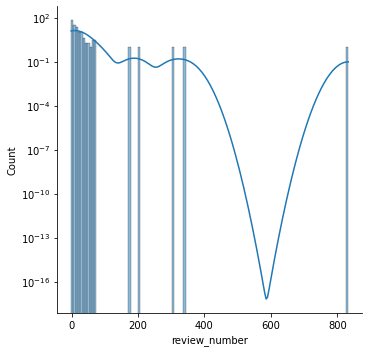

In [37]:
fig = sns.displot(sheet1.review_number, kde=True)
plt.yscale('log')
# plt.ylim(0.1, 100)
# conclusion: it's like J-shaped distribution, dataset is too small

In [38]:
# clean provider-details__specialty column to provider_detail column
len(sheet1['provider-details__specialty'].unique()) # result is 16
array = sheet1['provider-details__specialty'].unique()
dic = {}
for i in range(len(array)):
    dic[array[i]] = i
provider_detail = []
for i in range(len(sheet1['provider-details__specialty'])):
    ori = sheet1['provider-details__specialty'].iloc[i]
    provider_detail.append(dic[ori])
sheet1['provider_detail'] = provider_detail
dic

{'Cosmetic, Plastic & Reconstructive Surgery': 0,
 'Dermatology': 1,
 'Head & Neck Surgical Oncology': 2,
 'Cosmetic Medicine': 3,
 'Pediatric Plastic Surgery': 4,
 'Oculoplastic Surgery': 5,
 'Ophthalmology': 6,
 'General Surgery': 7,
 'Emergency Medicine': 8,
 'Ear, Nose, and Throat': 9,
 'Orthopedic Hand Surgery': 10,
 'Dermatopathology': 11,
 'Mohs Micrographic Surgery': 12,
 'Oral & Maxillofacial Surgery': 13,
 'Nursing (Nurse Practitioner)': 14,
 nan: 15}

In [39]:
# for check use
feat_fill = sheet1[sheet1['feats-of-strength__feat-title'].isna()]
len(feat_fill) # 38
feat_fill

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance 2,star-rating href,review_number,provider_detail
49,"Dr. Jerrold Laskin, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,12425 Old Meridian St Ste B1,"Carmel, IN 46032",NaN,NaN,NaN,13.9 mi,NaN,-1,0
50,"Dr. Elizabeth Grasee, MD",General Surgery,-1.0,Leave A Review,NaN,12425 Old Meridian St Ste B1,"Carmel, IN 46032",NaN,NaN,NaN,13.9 mi,https://www.healthgrades.com/physician/dr-jerr...,-1,7
78,"Dr. Kimberly Short, MD","Cosmetic, Plastic & Reconstructive Surgery",3.5,42 ratings,with,317 S Delaware St,"Indianapolis, IN 46204",NaN,NaN,NaN,0.4 mi,NaN,42,0
80,"Dr. Sidhbh Gallagher, MD","Cosmetic, Plastic & Reconstructive Surgery",4.0,17 ratings,with,545 Barnhill Dr,"Indianapolis, IN 46202",NaN,NaN,NaN,1.2 mi,NaN,17,0
91,"Dr. Barry Eppley, MD","Cosmetic, Plastic & Reconstructive Surgery",3.5,36 ratings,with,12188a N Meridian St Ste 325,"Carmel, IN 46032",NaN,NaN,NaN,13.7 mi,NaN,36,0
101,"Dr. Catherine Winslow, MD","Ear, Nose, and Throat",3.5,15 ratings,with,2000 E 116th St Ste 200,"Carmel, IN 46032",NaN,NaN,NaN,13.2 mi,NaN,15,9
105,"Dr. Jason Cacioppo, MD","Cosmetic, Plastic & Reconstructive Surgery",3.5,24 ratings,with,1550 E County Line Rd Ste 320,"Indianapolis, IN 46227",NaN,NaN,NaN,9.3 mi,NaN,24,0
106,"Dr. Ally-Khan Somani, MD",Mohs Micrographic Surgery,3.5,6 ratings,with,550 University Blvd Ste 3240,"Indianapolis, IN 46202",NaN,NaN,NaN,1.1 mi,NaN,6,12
118,"Dr. Tristan Stonger, MD","Cosmetic, Plastic & Reconstructive Surgery",3.0,28 ratings,with,2920 S Mcintire Dr Ste 150,"Bloomington, IN 47403",NaN,NaN,NaN,49 mi,NaN,28,0
124,"Dr. Christopher Vashi, MD",General Surgery,3.0,6 ratings,with,340 Thomas More Pkwy Ste 100,"Crestview Hills, KY 41017",NaN,NaN,NaN,99.4 mi,NaN,6,7


In [40]:
# clean feats-of-strength__feat-title column to feat
sheet1['feats-of-strength__feat-title'].fillna("NaN", inplace=True)
sheet1['feats-of-strength__feat-title 2'].fillna("NaN", inplace=True)
sheet1['feats-of-strength__feat-title 3'].fillna("NaN", inplace=True)
array = sheet1['feats-of-strength__feat-title'].unique()
array = np.append(array, sheet1['feats-of-strength__feat-title 2'].unique())
array = np.append(array, sheet1['feats-of-strength__feat-title 3'].unique())
lst = list(set(array))
dic = {}
for i in range(len(lst)):
    dic[lst[i]] = i
dic

{'Employs friendly staff': 0,
 'Explains conditions well': 1,
 'NaN': 2,
 'Offers Telehealth': 3,
 'Patients found trustworthy': 4,
 'Low wait times': 5,
 'Easy scheduling': 6}

In [41]:
sheet1

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance 2,star-rating href,review_number,provider_detail
1,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery",4.5,51 ratings,with,10293 N Meridian St Ste 200,"Indianapolis, IN 46290",Offers Telehealth,Easy scheduling,Employs friendly staff,11.5 mi,NaN,51,0
2,"Dr. Janet Turkle, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,303 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN,303,0
3,"Dr. Emily Hrisomalos, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,69 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN,69,0
4,"Dr. Christopher Jones, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,39 ratings,with,320 N Meridian St,"Indianapolis, IN 46204",Easy scheduling,Employs friendly staff,Explains conditions well,0.2 mi,NaN,39,0
5,"Dr. Rachel Scott, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,25 ratings,with,100 Hospital Ln,"Danville, IN 46122",Offers Telehealth,Easy scheduling,Employs friendly staff,18.3 mi,NaN,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Dr. Leonard Singer, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,10475 Reading Rd Ste 404,"Cincinnati, OH 45241",NaN,NaN,NaN,99 mi,https://www.healthgrades.com/physician/dr-scot...,-1,0
155,"Dr. Geoffrey Randolph, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,7950 W Jefferson Blvd,"Fort Wayne, IN 46804",NaN,NaN,NaN,100 mi,https://www.healthgrades.com/physician/dr-leon...,-1,0
156,"Dr. Frank Welsh, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,10921 Reed Hartman Hwy Ste 209a,"Blue Ash, OH 45242",NaN,NaN,NaN,100.9 mi,https://www.healthgrades.com/physician/dr-geof...,-1,0
157,"Dr. Neilendu Kundu, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,4750 E Galbraith Rd Ste 207,"Cincinnati, OH 45236",Offers Telehealth,NaN,NaN,102.4 mi,https://www.healthgrades.com/physician/dr-fran...,-1,0


In [42]:
# for check use
# len(sheet1['feats-of-strength__feat-title']) == len(sheet1['feats-of-strength__feat-title 2']) # True
# len(sheet1['feats-of-strength__feat-title 2']) == len(sheet1['feats-of-strength__feat-title 3']) # True

In [43]:
# change 'feats-of-strength__feat-title' column to feats column
# change 'feats-of-strength__feat-title 2' column to feats1 column
# change 'feats-of-strength__feat-title 3' column to feats2 column
feats, feats1, feats2 = [], [], []
for i in range(len(sheet1['feats-of-strength__feat-title'])):
    feats.append(dic[sheet1['feats-of-strength__feat-title'].iloc[i]])
    feats1.append(dic[sheet1['feats-of-strength__feat-title 2'].iloc[i]])
    feats2.append(dic[sheet1['feats-of-strength__feat-title 3'].iloc[i]])
sheet1['feats'] = feats
sheet1['feats1'] = feats1
sheet1['feats2'] = feats2
sheet1

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance 2,star-rating href,review_number,provider_detail,feats,feats1,feats2
1,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery",4.5,51 ratings,with,10293 N Meridian St Ste 200,"Indianapolis, IN 46290",Offers Telehealth,Easy scheduling,Employs friendly staff,11.5 mi,NaN,51,0,3,6,0
2,"Dr. Janet Turkle, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,303 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN,303,0,6,0,1
3,"Dr. Emily Hrisomalos, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,69 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8 mi,NaN,69,0,6,0,1
4,"Dr. Christopher Jones, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,39 ratings,with,320 N Meridian St,"Indianapolis, IN 46204",Easy scheduling,Employs friendly staff,Explains conditions well,0.2 mi,NaN,39,0,6,0,1
5,"Dr. Rachel Scott, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,25 ratings,with,100 Hospital Ln,"Danville, IN 46122",Offers Telehealth,Easy scheduling,Employs friendly staff,18.3 mi,NaN,25,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Dr. Leonard Singer, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,10475 Reading Rd Ste 404,"Cincinnati, OH 45241",NaN,NaN,NaN,99 mi,https://www.healthgrades.com/physician/dr-scot...,-1,0,2,2,2
155,"Dr. Geoffrey Randolph, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,7950 W Jefferson Blvd,"Fort Wayne, IN 46804",NaN,NaN,NaN,100 mi,https://www.healthgrades.com/physician/dr-leon...,-1,0,2,2,2
156,"Dr. Frank Welsh, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,10921 Reed Hartman Hwy Ste 209a,"Blue Ash, OH 45242",NaN,NaN,NaN,100.9 mi,https://www.healthgrades.com/physician/dr-geof...,-1,0,2,2,2
157,"Dr. Neilendu Kundu, MD","Cosmetic, Plastic & Reconstructive Surgery",-1.0,Leave A Review,NaN,4750 E Galbraith Rd Ste 207,"Cincinnati, OH 45236",Offers Telehealth,NaN,NaN,102.4 mi,https://www.healthgrades.com/physician/dr-fran...,-1,0,3,2,2


In [44]:
# for check use
# sheet1['feats-of-strength__feat-title'].unique()

In [45]:
# for check use
# sheet1['feats-of-strength__feat-title 2'].unique()

In [46]:
# for check use
feat_fill = sheet1[sheet1['feats-of-strength__feat-title']=='NaN']
len(feat_fill) # 38
# feat_fill

38

In [47]:
# prep_sheet1 is ready for model usage
prep_sheet1 = sheet1[['provider-details__specialty', 'sr-only', 'review_number', 'feats', 'feats1', 'feats2']]
prep_sheet1.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/prep_sheet1.csv')

# Model

In [48]:
import scipy.stats as sps
from fitter import Fitter, get_common_distributions, get_distributions

In [49]:
f = Fitter(sheet1['sr-only'])
f.fit()

Fitting 110 distributions:  27%|████           | 30/110 [00:01<00:05, 14.23it/s]/Users/jennyhuang/yes/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 110 distributions:  32%|████▊          | 35/110 [00:01<00:03, 19.60it/s]/Users/jennyhuang/yes/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/Users/jennyhuang/yes/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local di

/Users/jennyhuang/yes/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
wrapcauchy,32.405518,736.062167,-235.126293,inf,0.278481,2.510432e-11
levy_l,42.643123,650.609431,-196.811994,inf,0.341959,5.361267e-17
weibull_max,42.857869,619.654758,-190.955726,inf,0.306403,1.152080e-13
genhyperbolic,44.994138,794.911002,-173.144950,inf,NaN,NaN
johnsonsu,45.121250,1006.382371,-177.761811,inf,0.655678,4.569474e-67


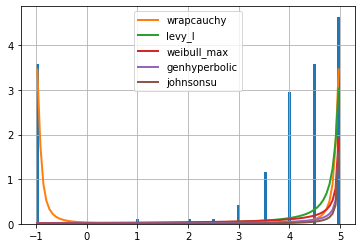

In [50]:
f.summary()

In [51]:
# use Kolmogorov-Smirnov test to find out whether the rating info comes from normal distribution
ks = sps.kstest(sheet1['sr-only'], "norm")
ks

KstestResult(statistic=0.7659422334084011, pvalue=1.6436512774434648e-97, statistic_location=2.5, statistic_sign=-1)

/Users/jennyhuang/yes/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
